In [205]:
import img2pdf
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use('tableau-colorblind10')


In [206]:
! rm -r data/figures/ 

In [207]:
! mkdir data/figures/ 

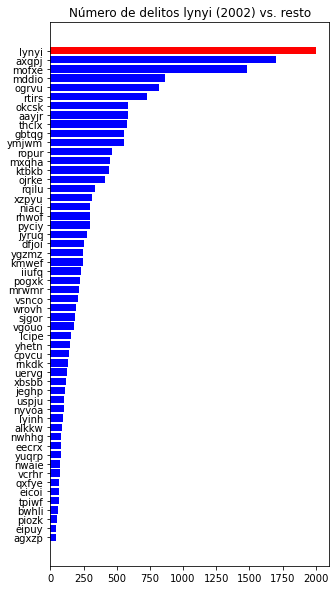

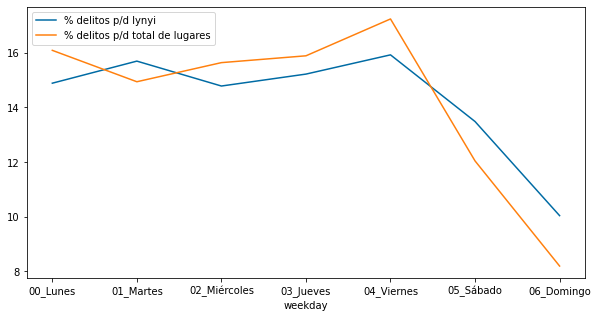

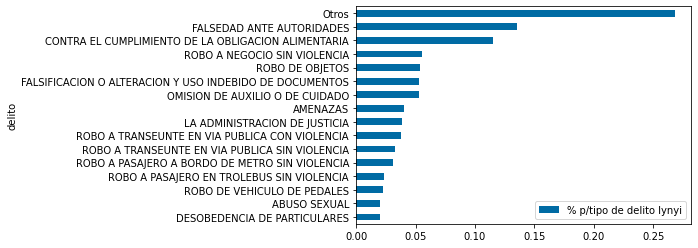

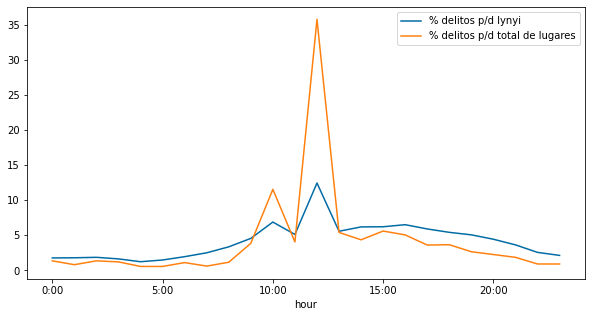

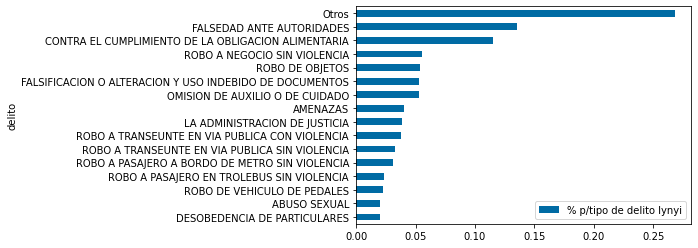

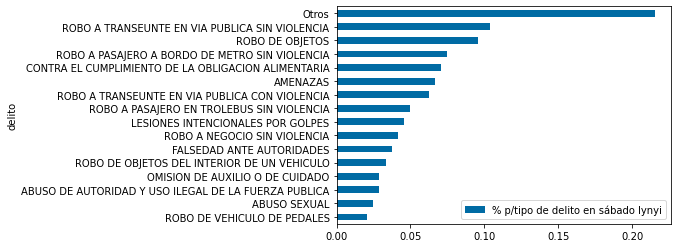

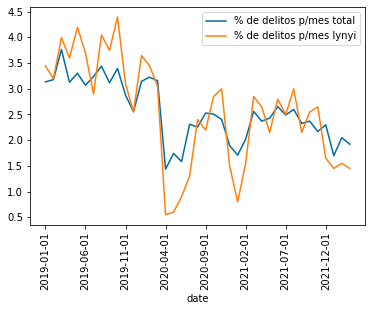

In [208]:
nombres= ["lynyi"]
for place in nombres:
    os.mkdir(f"data/figures/{place}" )
    n_delitos= pd.read_csv('data/bmks/count_delitos_by_lugar.csv')
    colors = ['red' if i == place else 'blue' for i in list(n_delitos.sort_values('n_delitos').lugar.values)]
    plt.figure(figsize=(5,10))
    plt.barh(n_delitos.sort_values('n_delitos').lugar.values,n_delitos.sort_values('n_delitos').n_delitos.values, color = colors)
    total = n_delitos.query(f'lugar == "{place}"').n_delitos.values[0]
    plt.title(f'Número de delitos {place} ({total}) vs. resto')
    plt.savefig(f'data/figures/{place}/01.png')
    
    wd_bmk= pd.read_csv('data/bmks/wd_aggregation.csv')
    wd= pd.read_csv(f'data/by_place/{place}/wd_aggregation.csv')
    pd.concat([wd_bmk.set_index('weekday').rename(columns = {'porc_delitos':f'% delitos p/d {place}'}),
               wd.set_index('weekday').rename(columns = {'porc_delitos':'% delitos p/d total de lugares'})], axis=1).plot(figsize= (10, 5))
    plt.savefig(f'data/figures/{place}/02.png')
    top_del=pd.read_csv(f'data/by_place/{place}/top_n_delitos.csv')
    (top_del
     .set_index('delito')
     .sort_values('porc_delitos')
     .rename(columns = {'porc_delitos':f'% p/tipo de delito {place}'})
     .plot.barh())
    plt.savefig(f'data/figures/{place}/03.png')
    
    
    wd_bmk= pd.read_csv('data/bmks/hour_aggregation.csv')
    wd= pd.read_csv(f'data/by_place/{place}/hour_aggregation.csv')
    pd.concat([wd_bmk.set_index('hour').rename(columns = {'porc_delitos':f'% delitos p/d {place}'}),
               wd.set_index('hour').rename(columns = {'porc_delitos':'% delitos p/d total de lugares'})], axis=1).plot(figsize= (10, 5))
    plt.savefig(f'data/figures/{place}/04.png')
                    
    top_del=pd.read_csv(f'data/by_place/{place}/top_n_delitos.csv')
    (top_del
     .set_index('delito')
     .sort_values('porc_delitos')
     .rename(columns = {'porc_delitos':f'% p/tipo de delito {place}'})
     .plot.barh())
    plt.savefig(f'data/figures/{place}/05.png')
    
    top_del=pd.read_csv(f'data/by_place/{place}/top_n_delitos_sat.csv')
    (top_del
     .set_index('delito')
     .sort_values('porc_delitos')
     .rename(columns = {'porc_delitos':f'% p/tipo de delito en sábado {place}'})
     .plot.barh())
    plt.savefig(f'data/figures/{place}/06.png')
    
    ts_bmk= pd.read_csv('data/bmks/ts_aggregation.csv')
    ts= pd.read_csv(f'data/by_place/{place}/ts_aggregation.csv')
    pd.concat([
        ts_bmk.set_index('date').rename(columns = {'porc_delitos':f'% de delitos p/mes total'}),
        ts.set_index('date').rename(columns = {'porc_delitos':f'% de delitos p/mes {place}'}),
        ], axis=1).plot(rot = 90)
    plt.savefig(f'data/figures/{place}/07.png')